In [1]:
from simulator import *
from algorithms import *
from algorithms_2 import *
from MCTS import *

In [2]:
lava_maze = """
-----------------
|..L....L....L..|
|..L..LLL..L.LL.|
|..L..L.......L.|
|.....L.....L...|
|..L....L....L..|
|..LLL..L.LLLL..|
|..L.L..L..L....|
|..L....L....L..|
|.....L.....L...|
-----------------
"""

simple_room = """
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............

"""

In [3]:
map = make_map(map_str=lava_maze, n_apples=5, seed=time.time())
print(map)

Placing 5 apples between (1, 2) and (16, 9)
Placed apple at: (8, 4)
Placed apple at: (15, 4)
Placed apple at: (9, 8)
Placed apple at: (13, 8)
Placed apple at: (12, 4)

MAZE: "mylevel", ' '
FLAGS:hardfloor
INIT_MAP: solidfill,' '
GEOMETRY:center,center
MAP
-----------------
|..L....L....L..|
|..L..LLL..L.LL.|
|..L..L.......L.|
|.....L.....L...|
|..L....L....L..|
|..LLL..L.LLLL..|
|..L.L..L..L....|
|..L....L....L..|
|.....L.....L...|
-----------------
ENDMAP
REGION:(0,0,17,11),lit,"ordinary"
BRANCH:(1,1,1,1),(0,0,0,0)
OBJECT:('%',"apple"),(8, 4)
OBJECT:('%',"apple"),(15, 4)
OBJECT:('%',"apple"),(9, 8)
OBJECT:('%',"apple"),(13, 8)
OBJECT:('%',"apple"),(12, 4)
STAIR:(15, 9),down



In [4]:
env = create_env(map, apple_reward=0.75, penalty_time=-0.1)
env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a neutral human Caveman.              
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                              -----------------                                 
                              |@.}....}....}..|                                 
                              |..}..}}}..}.}}.|                                 
                              |..}..}.......}.|                                 
                              |.....}.%...}..%|                                 
                              |..}....}....}..|                                 
                           

-0.4999999999999999

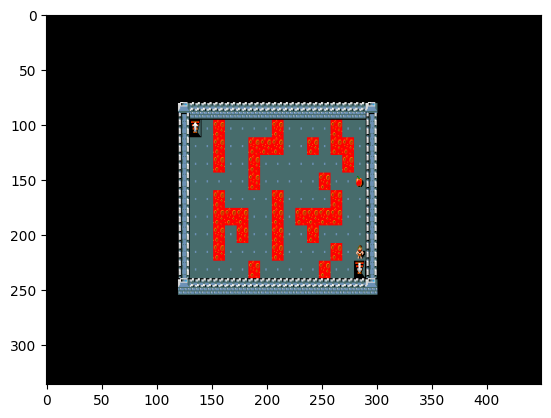

In [5]:
# A star with bonus to tiles that have apples nearby
simulate_with_heuristic(env, a_star_apple, h=manhattan_distance, apple_bonus=3)

-0.2499999999999999

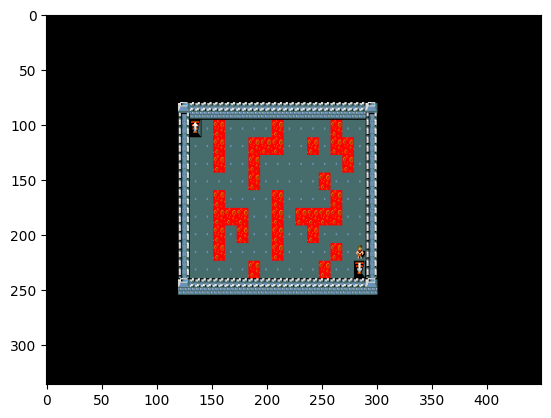

In [6]:
# A* with modified heuristic that considers the distance to apples then stairs
simulate_with_heuristic(env, a_star_collect_apples, weight=1)

Apple positions: [(np.int64(9), np.int64(38)), (np.int64(9), np.int64(45)), (np.int64(13), np.int64(39))]
Path found:
6 31
Actions to take: []
Apple collected in the path: 0
Expected Reward:  0.9
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                              -----------------                                
                              |@.}....}....}..|                                
                              |..}..}}}..}.}}.|                                
                              |..}..}.......}.|                                
                              |.....}.%...}..%|                                
    

0

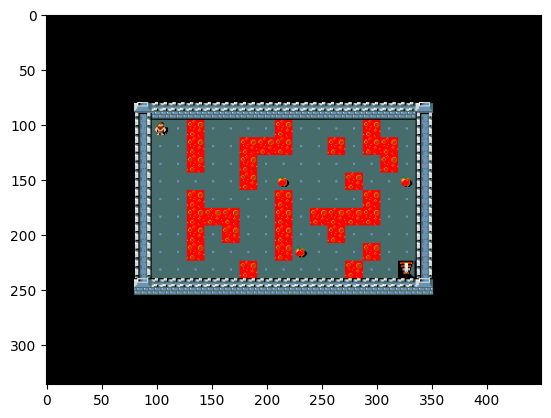

In [7]:
# Monte Carlo with Random
simulate_with_heuristic(
    env, mcts, iterations=10000
)

Apple positions: [(np.int64(9), np.int64(38)), (np.int64(9), np.int64(45)), (np.int64(13), np.int64(39))]
Path found:
6 31
Actions to take: []
Apple collected in the path: 0
Expected Reward:  0.9
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                              -----------------                                
                              |@.}....}....}..|                                
                              |..}..}}}..}.}}.|                                
                              |..}..}.......}.|                                
                              |.....}.%...}..%|                                
    

0

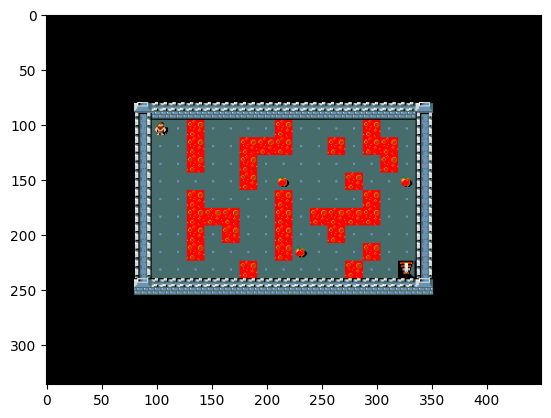

In [8]:
# Monte Carlo Tree Search with heuristic
simulate_with_heuristic(
    env, mcts, iterations=10000, policy=heuristic_rollout_policy,
)

-0.5000000000000006

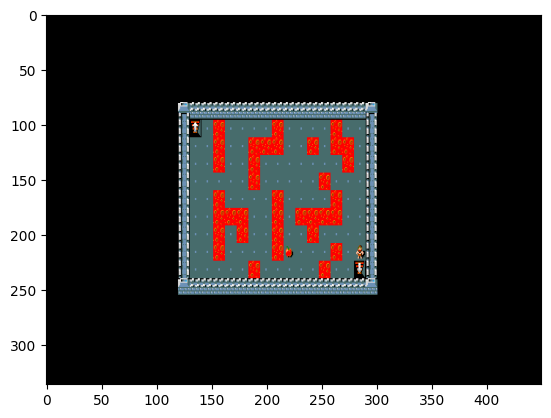

In [9]:
# Beam Search
simulate_with_heuristic(
    env, beam_search_path_planner, apple_reward=7.5,
    beam_width=5
)